In [59]:
import xarray
import datetime as dt
import matplotlib.pyplot as plt
import metpy

In [8]:
daily_mean_temp = xarray.open_dataset("/home/scratch/geog790/2mT_daily_mean_1991_2020.nc")
daily_stdev_temp = xarray.open_dataset("/home/scratch/geog790/2mT_daily_stdev_1991_2020.nc")

In [11]:
daily_2022_temps = xarray.open_dataset("https://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis/surface_gauss/air.2m.gauss.2022.nc")
daily_2022_temps

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 148)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 2022-01-01 ... 2022-02-06T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     COARDS
    title:                           4x daily NMC reanalysis (2014)
    history:                         created 2017/12 by Hoop (netCDF2.3)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    DODS_EXTRA.Unlimited_Dimension:  time

In [46]:
daily_temps = daily_2022_temps.sel(lat=40.9517, lon=88.125+180)
daily_means = daily_mean_temp.sel(lat=40.9517, lon=88.125+180)
daily_stdev = daily_stdev_temp.sel(lat=40.9517, lon=88.125+180)

#daily_mean = daily_means['dayofyear'].groupby(daily_temps["time"])
daily_temps = daily_temps.groupby('time.dayofyear').mean(dim="time")


In [63]:
daily_anom = daily_temps - daily_means
daily_stan = daily_anom/daily_stdev


x = daily_stan['dayofyear']
y = daily_stan['air']
y

<xarray.DataArray 'air' (dayofyear: 37)>
array([-0.59443665, -1.515092  , -1.7443347 ,  0.49049214, -0.5042867 ,
       -1.4001757 , -1.9947397 ,  0.08558258, -0.4279176 , -1.3956264 ,
       -0.9915694 ,  0.70988995,  0.894676  ,  0.7618661 ,  0.22743462,
       -1.1713065 ,  0.4387195 ,  0.85113674, -0.39516628, -1.9028412 ,
       -2.66561   , -0.55438095, -0.35980523,  0.5341138 , -2.3121147 ,
       -2.9366443 ,  0.24598262, -1.1214175 , -0.8534144 ,  0.18154395,
        0.00442088,  0.9364022 , -1.1627164 , -1.3639927 , -1.5764534 ,
       -1.7313313 ,  0.39757943], dtype=float32)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 9 ... 30 31 32 33 34 35 36 37
    lat        float32 40.95
    lon        float32 268.1

(0.0, 37.0)

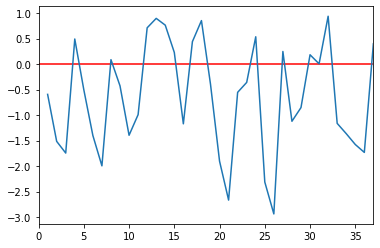

In [64]:
plt.plot(x,y)
plt.hlines(0,-10,40, color = 'red')
plt.xlim(0,37)

In [4]:
! ls /home/scratch/geog790

2mT_daily_mean_1991_2020.nc   olr_daily_stdev_1991_2020.nc
2mT_daily_stdev_1991_2020.nc  z500_daily_mean_1991_2020.nc
olr_daily_mean_1991_2020.nc   z500_daily_stdev_1991_2020.nc
